In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
from ptitprince import RainCloud

from pandas_profiling import ProfileReport

print(os.getcwd())

/src/Solafune/夜間光データから土地価格を予測/src


In [2]:
INPUT_DIR = '/src/Solafune/夜間光データから土地価格を予測/data/inputs/'
OUTPUT_DIR = '/src/Solafune/夜間光データから土地価格を予測/data/outputs/'

os.makedirs(OUTPUT_DIR, exist_ok=True)

train_df = pd.read_csv(os.path.join(INPUT_DIR, 'TrainDataSet.csv'))
test_df = pd.read_csv(os.path.join(INPUT_DIR, 'EvaluationData.csv'))

In [3]:
train_df.columns

Index(['PlaceID', 'Year', 'AverageLandPrice', 'MeanLight', 'SumLight'], dtype='object')

In [17]:
train_df

,PlaceID,Year,AverageLandPrice,MeanLight,SumLight
0,1128,1993,740.909091,57.571430,403.0
1,1128,1994,739.390909,62.714287,439.0
2,1128,1995,739.390909,61.857143,433.0
3,1128,1996,739.390909,61.714287,432.0
4,1128,1997,739.390909,62.857143,440.0
...,...,...,...,...,...
21878,1141,2009,99.818182,10.978724,1032.0
21879,1141,2010,94.000000,16.734043,1573.0
21880,1141,2011,89.363636,12.595745,1184.0
21881,1141,2012,85.000000,13.775281,1226.0


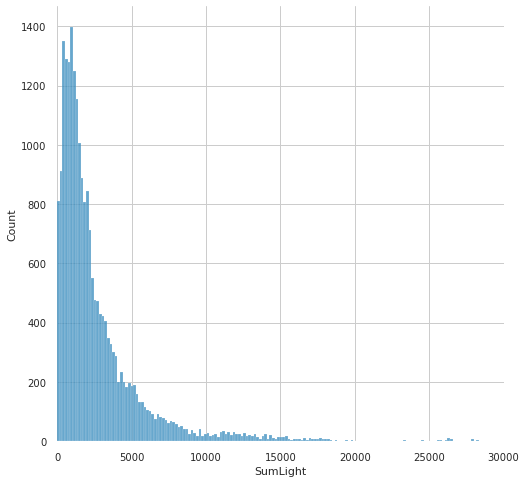

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=train_df, x=train_df['SumLight'])
plt.xlim(0, 30000)
ax.grid()

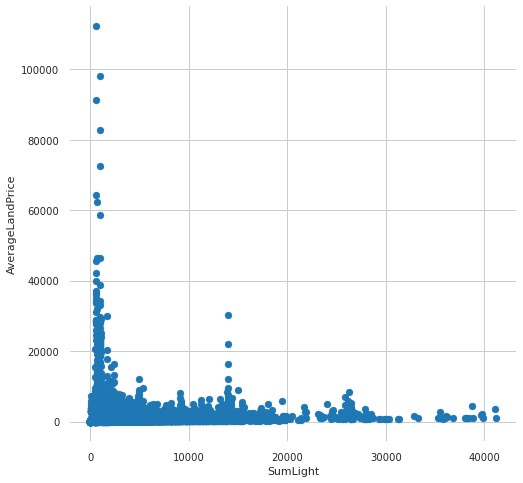

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(train_df['SumLight'], train_df['AverageLandPrice'])
ax.set_xlabel('SumLight')
ax.set_ylabel('AverageLandPrice')
ax.grid()

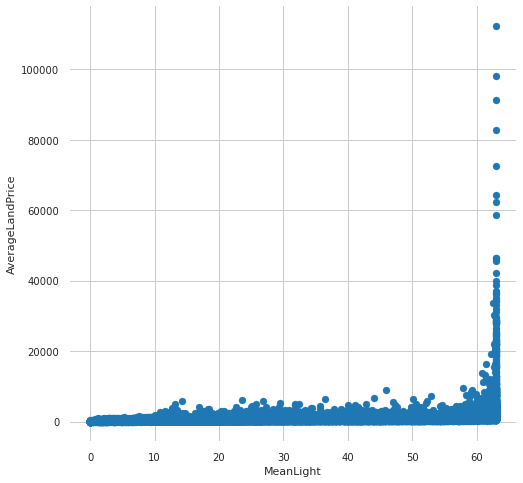

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(train_df['MeanLight'], train_df['AverageLandPrice'])
ax.set_xlabel('MeanLight')
ax.set_ylabel('AverageLandPrice')
ax.grid()

In [18]:
train_df['Year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 1992])

(array([1., 0., 2., 2., 2., 2., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 3.,
        3., 1., 0., 1.]),
 array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]),
 <BarContainer object of 21 artists>)

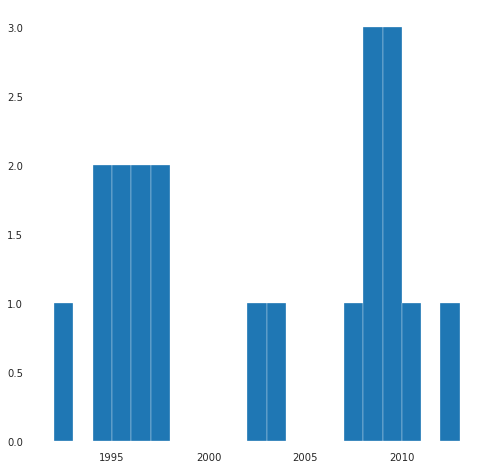

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
bins = range(1992, 2014, 1)
ax.hist(train_df['AverageLandPrice'].values.tolist(), bins=bins)

(array([2.1875e+04, 8.0000e+00]),
 array([1.09090909e+01, 5.61200000e+04, 1.12229091e+05]),
 <BarContainer object of 2 artists>)

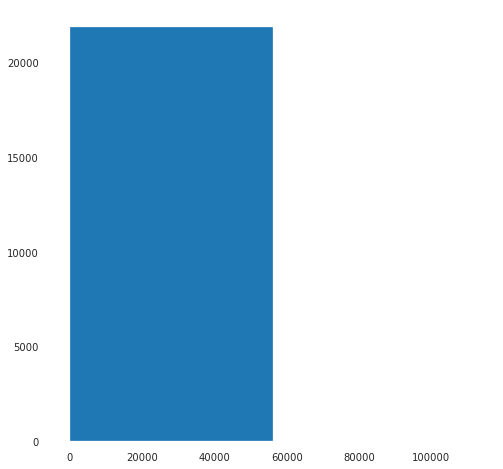

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
bins = range(1992, 2014, 1)
ax.hist(train_df['AverageLandPrice'], bins=2)

In [36]:
fig = plt.figure()
bins = range(1992, 2014, 1)
ax.hist(train_df['AverageLandPrice'].values.tolist(), bins=bins)

(array([1., 0., 2., 2., 2., 2., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 3.,
        3., 1., 0., 1.]),
 array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]),
 <BarContainer object of 21 artists>)

<Figure size 576x396 with 0 Axes>

In [26]:
train_df['AverageLandPrice']

0        740.909091
1        739.390909
2        739.390909
3        739.390909
4        739.390909
            ...    
21878     99.818182
21879     94.000000
21880     89.363636
21881     85.000000
21882     80.545455
Name: AverageLandPrice, Length: 21883, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]),
 <BarContainer object of 21 artists>)

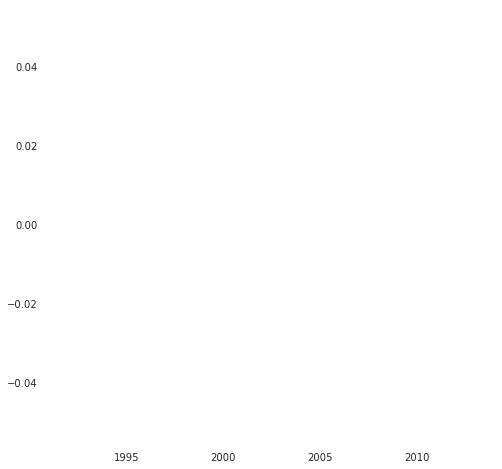

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
bins = range(1992, 2014, 1)
ax.hist(train_df['MeanLight'].values.tolist(), bins=bins)

In [52]:
train_df['MeanLight'].values

array([57.57143 , 62.714287, 61.857143, ..., 12.595745, 13.775281,
       13.011236])

Text(0, 0.5, 'AverageLandPrice')

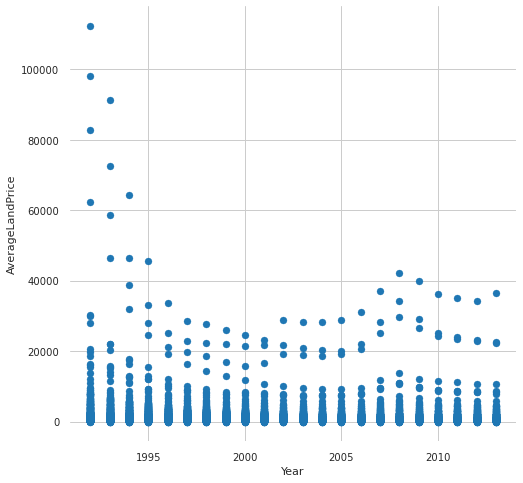

In [54]:
fig, ax = plt.subplots(figsize=(8,8))
x = train_df['Year'].values
plt.scatter(x, train_df['AverageLandPrice'])
ax.grid()
ax.set_xlabel('Year')
ax.set_ylabel('AverageLandPrice')